<a href="https://colab.research.google.com/github/Nishi-sys/Deep_Learning/blob/main/DL/Loan%20Prediction/Loan_Prediction_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing Steps

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [ ]:
# importing required libraries
import pandas as pd
import io

In [ ]:
# check version on pandas
print('Version of pandas:', pd.__version__)

Version of pandas: 2.0.3


In [ ]:
# reading the loan prediction data
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['loan_data (1).csv']))
print(df)

KeyError: 'loan_data (1).csv'

In [ ]:
# looking at the first five rows of the data
data.head()

In [ ]:
url = 'https://raw.githubusercontent.com/Nishi-sys/Deep_Learning/main/loan_data.csv'
df = pd.read_csv(url)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# shape of the data
df.shape

(614, 13)

In [ ]:
# checking missing values in the data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# data types of the variables
data= df
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 1. Filling the missing values

### Categorical Data:
Replacing it with Mode

In [ ]:
print(data['Gender'].mode(),"\n")
print(data['Gender'].mode()[0])

0    Male
Name: Gender, dtype: object 

Male


In [ ]:
# filling missing values of categorical variables with mode

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

### Continuous Data: Mean

In [ ]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)


In [ ]:
# checking missing values after imputation
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 2. Converting categories to numbers

In [ ]:
# converting the categories into numbers using map function
#data['Categorical']=data['Categorical'].map(dictionary--> {Key('original value'):Value('mapped value')})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## 3. Bringing all the variables in range 0 to 1

<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

In [ ]:
# bringing variables in the range 0 to 1
# data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())
    print(i, data[i].min(), data[i].mean(), data[i].max(),"\n") #For ref.

Gender 0.0 0.18241042345276873 1.0 

Married 0.0 0.6530944625407166 1.0 

Dependents 0.0 0.24809989142236696 1.0 

Education 0.0 0.7817589576547231 1.0 

Self_Employed 0.0 0.13355048859934854 1.0 

ApplicantIncome 0.0 0.06497785137152284 1.0 

CoapplicantIncome 0.0 0.03890958787594742 1.0 

LoanAmount 0.0 0.19885985841123324 1.0 

Loan_Amount_Term 0.0 0.7060051783178818 1.0 

Credit_History 0.0 0.8550488599348535 1.0 

Property_Area 0.0 0.5187296416938111 1.0 

Loan_Status 0.0 0.6872964169381107 1.0 



In [ ]:
# again looking at first five rows of pre-processed data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# saving the pre-processed data
data.to_csv('loan_prediction_data.csv', index=False)

In [ ]:
files.download('loan_prediction_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ModuleNotFoundError: No module named 'domains'

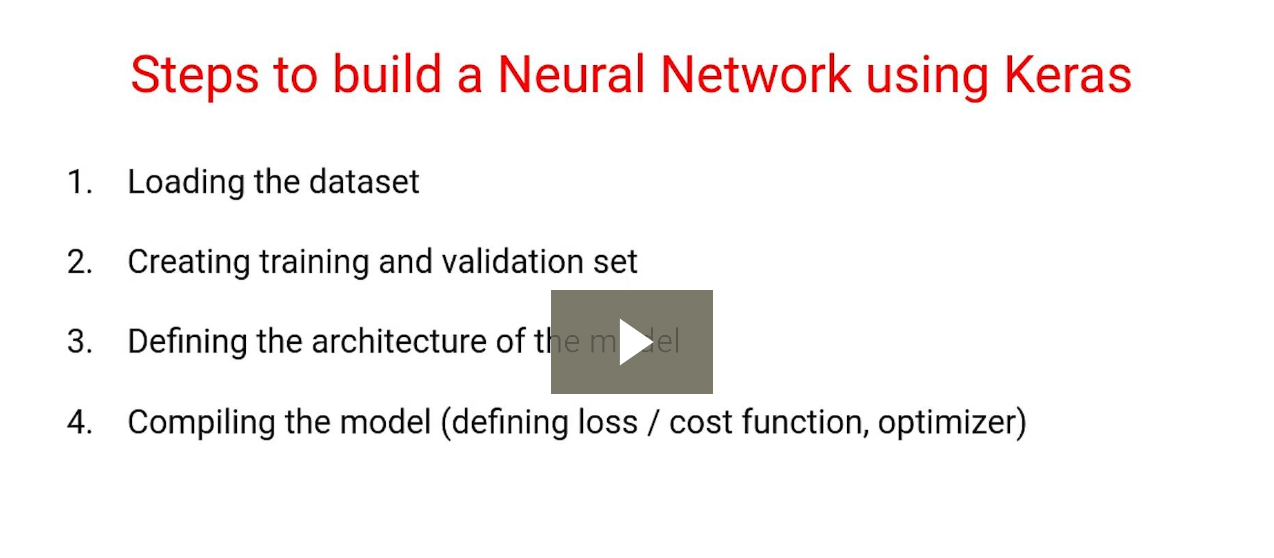